### GBDT调参

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline

/Users/Suimaru/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Suimaru/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
train = pd.read_csv('train_modified.csv')
target='Disbursed'
IDcol = 'ID'
train['Disbursed'].value_counts() 

0.0    85747
1.0     1273
Name: Disbursed, dtype: int64

In [6]:
train = train.iloc[:20000]

In [8]:
x_columns = [x for x in train.columns if x not in [target, IDcol]]
X = train[x_columns]
y = train['Disbursed']

In [9]:
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X,y)
y_pred = gbm0.predict(X)
y_predprob = gbm0.predict_proba(X)[:,1]
print "Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred)
print "AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob)

Accuracy : 0.9852
AUC Score (Train): 0.900531


In [10]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.81285, std: 0.01967, params: {'n_estimators': 20},
  mean: 0.81438, std: 0.01947, params: {'n_estimators': 30},
  mean: 0.81404, std: 0.01970, params: {'n_estimators': 40},
  mean: 0.81593, std: 0.01868, params: {'n_estimators': 50},
  mean: 0.81927, std: 0.01596, params: {'n_estimators': 60},
  mean: 0.81722, std: 0.01750, params: {'n_estimators': 70},
  mean: 0.81485, std: 0.01732, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.8192660696138212)

In [11]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.81199, std: 0.02073, params: {'min_samples_split': 100, 'max_depth': 3},
  mean: 0.81267, std: 0.01985, params: {'min_samples_split': 300, 'max_depth': 3},
  mean: 0.81238, std: 0.01937, params: {'min_samples_split': 500, 'max_depth': 3},
  mean: 0.80925, std: 0.02051, params: {'min_samples_split': 700, 'max_depth': 3},
  mean: 0.81846, std: 0.01843, params: {'min_samples_split': 100, 'max_depth': 5},
  mean: 0.81630, std: 0.01810, params: {'min_samples_split': 300, 'max_depth': 5},
  mean: 0.81315, std: 0.01898, params: {'min_samples_split': 500, 'max_depth': 5},
  mean: 0.81262, std: 0.02090, params: {'min_samples_split': 700, 'max_depth': 5},
  mean: 0.81807, std: 0.02004, params: {'min_samples_split': 100, 'max_depth': 7},
  mean: 0.82137, std: 0.01733, params: {'min_samples_split': 300, 'max_depth': 7},
  mean: 0.81681, std: 0.01786, params: {'min_samples_split': 500, 'max_depth': 7},
  mean: 0.81383, std: 0.02327, params: {'min_samples_split': 700, 'max_depth': 7},
  me

In [12]:
param_test3 = {'min_samples_split':range(800,1900,200), 'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.81828, std: 0.02251, params: {'min_samples_split': 800, 'min_samples_leaf': 60},
  mean: 0.81731, std: 0.02344, params: {'min_samples_split': 1000, 'min_samples_leaf': 60},
  mean: 0.82220, std: 0.02250, params: {'min_samples_split': 1200, 'min_samples_leaf': 60},
  mean: 0.81447, std: 0.02125, params: {'min_samples_split': 1400, 'min_samples_leaf': 60},
  mean: 0.81495, std: 0.01626, params: {'min_samples_split': 1600, 'min_samples_leaf': 60},
  mean: 0.81528, std: 0.02140, params: {'min_samples_split': 1800, 'min_samples_leaf': 60},
  mean: 0.81590, std: 0.02517, params: {'min_samples_split': 800, 'min_samples_leaf': 70},
  mean: 0.81573, std: 0.02207, params: {'min_samples_split': 1000, 'min_samples_leaf': 70},
  mean: 0.82021, std: 0.02521, params: {'min_samples_split': 1200, 'min_samples_leaf': 70},
  mean: 0.81512, std: 0.01995, params: {'min_samples_split': 1400, 'min_samples_leaf': 70},
  mean: 0.81395, std: 0.02081, params: {'min_samples_split': 1600, 'min_samples_le

### DecisionTree演示

In [13]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

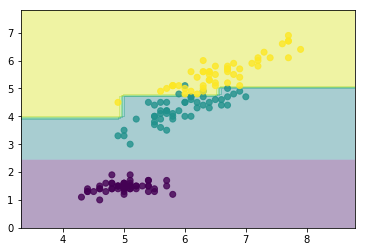

In [21]:
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [39]:
X, y = iris['data'], iris['target']

In [40]:
X = preprocessing.scale(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [50]:
clf2 = DecisionTreeClassifier(random_state=10)

In [51]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

In [52]:
clf2.score(X_test,y_test)

0.94999999999999996

### 文本特征提取

In [56]:
# -*- coding: utf-8 -*-  
import scipy as sp  
import numpy as np  
from sklearn.datasets import load_files  
from sklearn.cross_validation import train_test_split  
from sklearn.feature_extraction.text import  TfidfVectorizer  
  
'''''加载数据集，切分数据集80%训练，20%测试'''  
movie_reviews = load_files('endata')    
doc_terms_train, doc_terms_test, y_train, y_test = train_test_split(movie_reviews.data, movie_reviews.target, test_size = 0.3)  
      
'''''BOOL型特征下的向量空间模型，注意，测试样本调用的是transform接口'''  
count_vec = TfidfVectorizer(binary = False, decode_error = 'ignore', stop_words = 'english')  
x_train = count_vec.fit_transform(doc_terms_train)  
x_test  = count_vec.transform(doc_terms_test)  
x       = count_vec.transform(movie_reviews.data)  
y       = movie_reviews.target  
print(doc_terms_train)  
print(count_vec.get_feature_names())  
print(x_train.toarray())  
print(movie_reviews.target)  

OSError: [Errno 2] No such file or directory: 'endata'